# **Technocolabs Softwares Internship Task I**

# BigMart Sales Prediction


**Implemented by: SUNIT TRIVEDI**

# *1. Problem Statement*
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

### **Statement Analysis**
* Supervised Machine Learning Problem.
* The Target Value is **Item_Outlet_Sales.**

### **Exploring business problem**
BigMart, a supermarket with multiple store branches, aims to forecast the sales of any product at any branch in order to achieve financial benefits such as optimal inventory management, efficient resource allocation, effective marketing and promotions, and many other financial benifits.

### **Goal**
**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**


This dataset is named **BigMart Sales**. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their                          Description
* **Item_Identifier:**                Unique product ID
* **Item_Weight	:**                    Weight of product
* **Item_Fat_Content	:**   Checks the Concentration of fat in the product
* **Item_Visibility	:**   The % of total display area of all similar products in a store
* **Item_Type:**    Category
* **Item_MRP	 :**          Maximum Retail Price for a Product
* **Outlet_Identifier	:**   Store ID
* **Outlet_Establishment_Year	:**The year in which store was established
* **Outlet_Size	:**The size of the store (Area Size Category)
* **Outlet_Location_Type	:**In Terms of city Tiers (Size)
* **Outlet_Type	:**Grocery store or a type of supermarket
* **Item_Outlet_Sales	:** Sales of the product In the Specific outlet

# *2. Hypothesis Generation Using Product, Store and City*
1. **City Type:** Stores located in urban should have higher Sales.
2. **Store Location:** Store located in popular market place shoud have higher Sales
3. **Populted City:** City with high population should have higher Sales.
4. **Store Size**: Stores with large size should have higher Sales.
5. **Staff**: Stores with more staff should have higher Sales.
6. **Branded Products**: Branded Products will have higher Sales.
7. **Product Visbility**: Products with large space should have higher Sales.
8. **Product Frequency**: More frequnct products will have high Sales.
9. **Utilities**: Daily Basic Products should have higher Sales.
10. **Promotional Offers**: Promo Products should have higher Sales.

# *3. Loading Packages, Libraries and Dataset*

In [429]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import matplotlib.colors # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline

#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Cross Validation
from sklearn.model_selection import cross_val_score as CVS

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [430]:
#path for the training set
train_path = "/content/Train.csv"
#path for the testing set
test_path = "/content/Test.csv"

In [431]:
# Reading Dataset Train.csv
train = pd.read_csv(train_path)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [432]:
# Reading Dataset Test.csv
test = pd.read_csv(test_path)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [433]:
# Rows and columns
print(f'Training Dataset (row, col): {train.shape} \n\nTesting Dataset (row, col): {test.shape}')

Training Dataset (row, col): (8523, 12) 

Testing Dataset (row, col): (5681, 11)


In [434]:
# Combine Both DataSets since both are Similiar
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 13)


In [435]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [436]:
# Summary of Dataset Train
data.describe(include=[object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,FDU15,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765.0,NaN,NaN,NaN,12.792854,4.652502,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204.0,NaN,NaN,NaN,0.065953,0.051459,0.0,0.027036,0.054021,0.094037,0.328391
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204.0,NaN,NaN,NaN,141.004977,62.086938,31.29,94.012,142.247,185.8556,266.8884
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204.0,NaN,NaN,NaN,1997.830681,8.371664,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# *4. Data Exploration*
The steps which are involved to understand, clean and prepare the data for building the predictive model:

* Missing values treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Outlier treatment
* Variable transformation
* Variable creation

### Missing Values

In [437]:
# Total number of missing values and percent of it.
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Item_Outlet_Sales,5681,39.995776
Outlet_Size,4016,28.273726
Item_Weight,2439,17.171219
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


In [438]:
# Check and imputate missing values
print('Missing Values in Outlet_Size :\n',data.Outlet_Size.value_counts())
print('\nMissing Values in Item_Weight :\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :
 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :
 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


**Outlet_Size** is a catogerical column, **mode** can be used to fill the values.

In [439]:
# Filling Outlet Size missing values
print('Missing Values in Outlet_Size: ', len(data[data.Outlet_Size.isnull()]))
miss_values = data.Outlet_Size.isnull()
O_Size_avg = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply(lambda x:O_Size_avg.loc[x])

# Checking if all values are filled
print('Missing values after filling: ' , sum(data['Outlet_Size'].isnull()))

Missing Values in Outlet_Size:  4016
Missing values after filling:  0


**Item_weight** is a numeric column, we need to **visulize** the its values/distribution to see clearly.

Text(0.5, 1.0, 'Item Wieght Distribution')

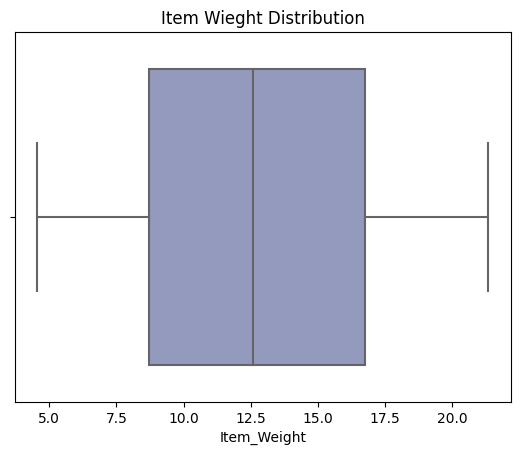

In [440]:
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')

No **Outliers** in **Item_wieght**, So **missing values** can be replaced with its mean

In [441]:
# Imputate missing values in item weight
print('Missing Values in Item_Weight: ', len(data[data.Item_Weight.isnull()]))
miss_values = data.Item_Weight.isnull()
item_wt_avg = data.pivot_table(values='Item_Weight', index ='Item_Identifier')
data.loc[miss_values, 'Item_Weight'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_wt_avg.loc[x])

# Checking if all values are filled
print('Missing values after filling: ' , sum(data['Item_Weight'].isnull()))

Missing Values in Item_Weight:  2439
Missing values after filling:  0


In [442]:
# Check info for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

###  Variable Identification

In [443]:
# Numerical
num_df = data.select_dtypes('number')

# Categorial
cat_df = data.select_dtypes('object')

In [444]:
# Dealing with catgorial data first
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019  

* **Item_Fat_Content**: Has **reapted values** in , replace them
* **Item_Type**: Has categories of **items**, that can be shrinked
* **Outlet_Type**: Has Store **type2**,and **type3**, that can be combined


In [445]:
# Replace reapted values in Item_Fat_Content
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Combine Item_Type, as we have 16 catgories, but **Item_identifier ID** has first two charachters defining the item type, these are **FD**, **DR**, **NC** means food, Drinks, Non-Consumables.

Convert Item_Type into these 3 categories

In [446]:
# Combine Item_Type, and create new category
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable'])
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Store has Types, **type2** and **Type3**, we can combine them, but it is to be first checked.

Check their sales, if both have approx. similier sales, we can combine them.

In [447]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There is a huge difference in sales, so not good idea to combine them.

In [448]:
# Lets deal with Numerical Data
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.065953,141.004977,1997.830681,2181.288914
std,4.651716,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* **Item_Visibility**: It has min **0** value, which makes no sense
* **Outlet_Establishment_Year**: It's better to address how old store is


###  Outliers

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

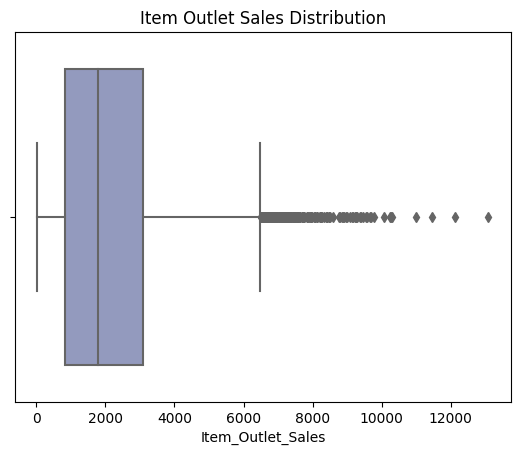

In [449]:
# Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [450]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

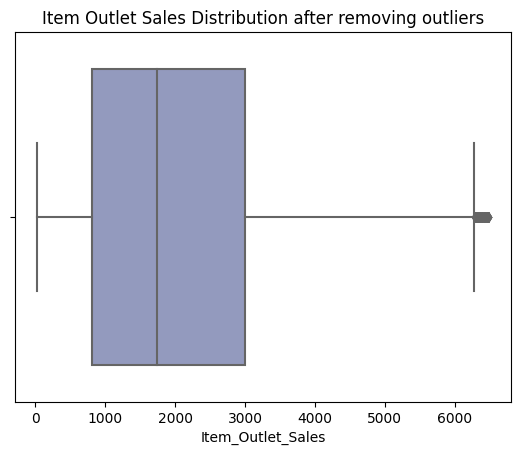

In [451]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [452]:
# Change Establishment_Year to Outlet_Age
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [453]:
# Consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  512
Missing values after filling:  0


In [454]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# *5. Data Visualization*

#### Univariate Plots
Countplots for categorial data

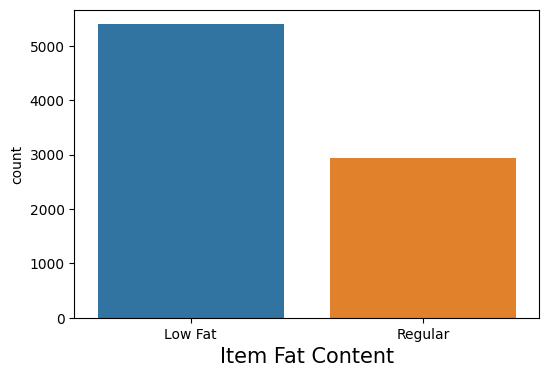

In [455]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

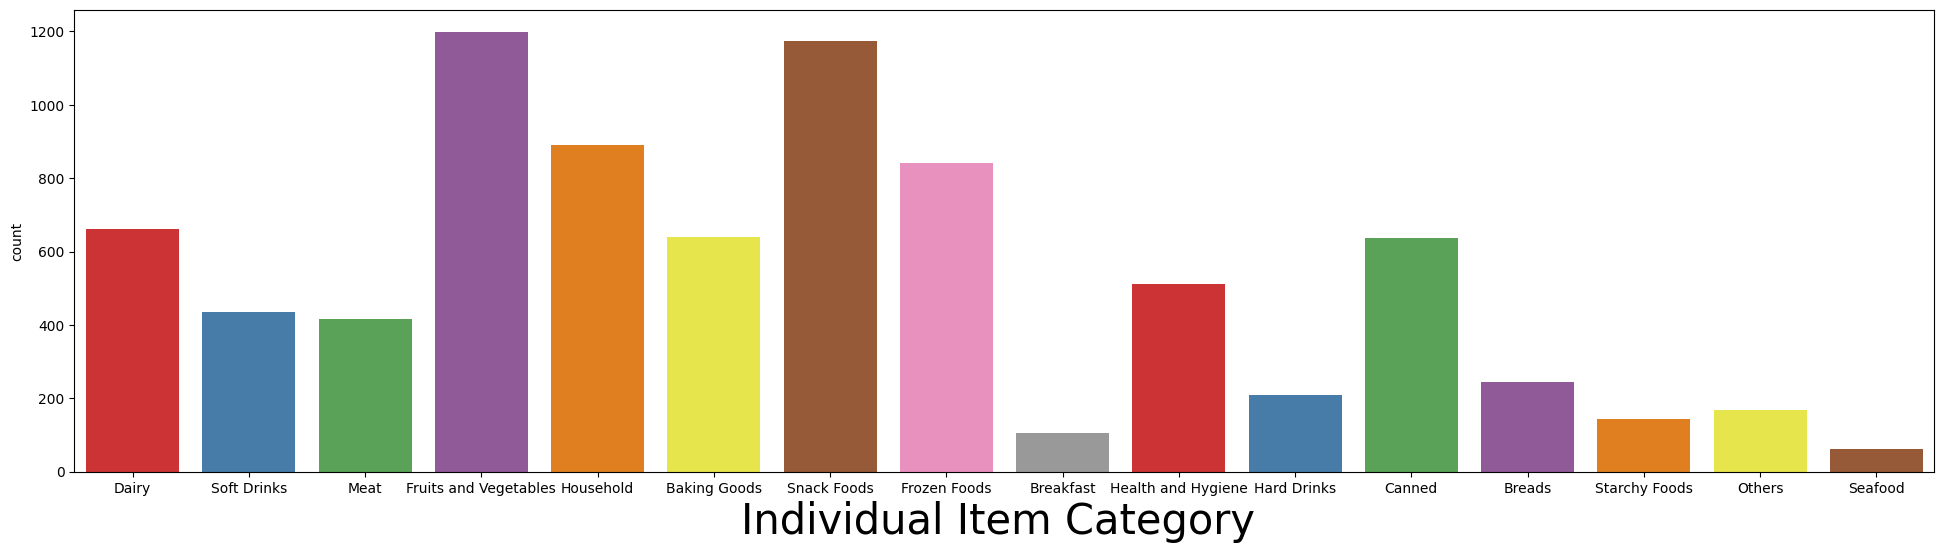

In [456]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=data, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

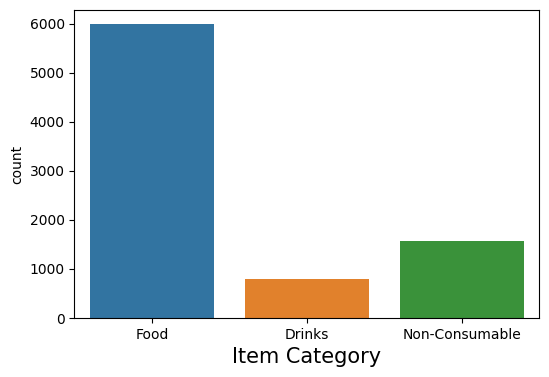

In [457]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

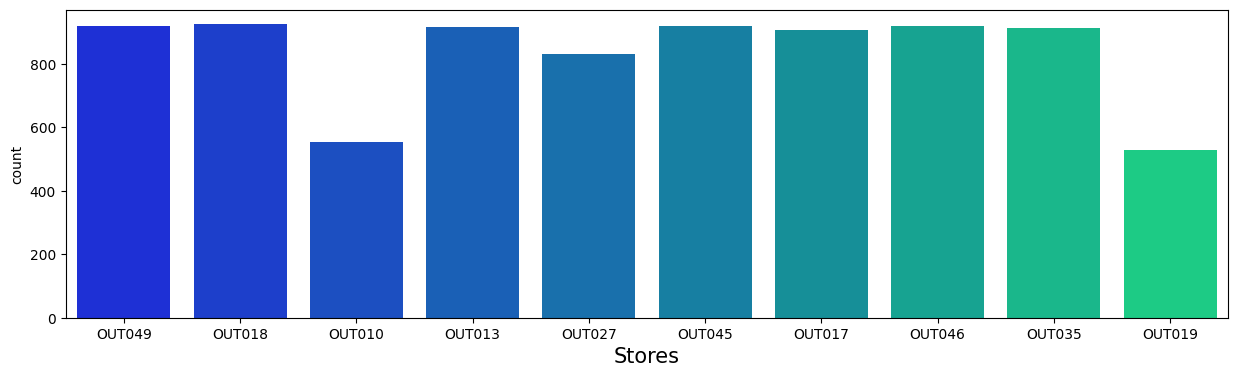

In [458]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

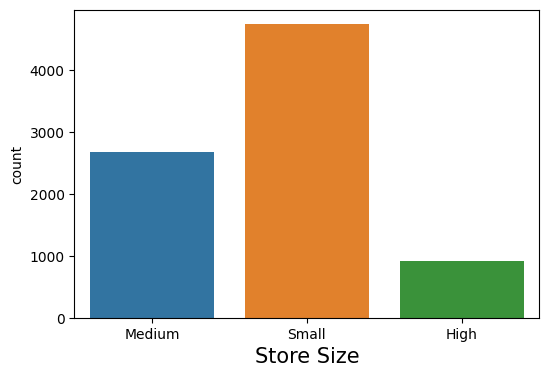

In [459]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

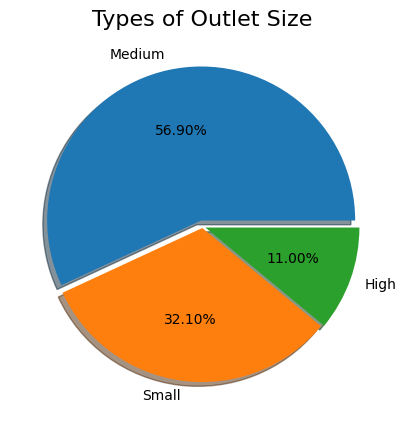

In [460]:
# Proportion of different types of Outlet Sizes
plt.figure(figsize=(5,5))
plt.pie(x=data['Outlet_Size'].value_counts(),
        labels=["Medium","Small",'High'],
        autopct='%1.2f%%',
        explode=[0.04,0.01,0.02],shadow=True,)

plt.title("Types of Outlet Size",fontsize=16)
plt.show()

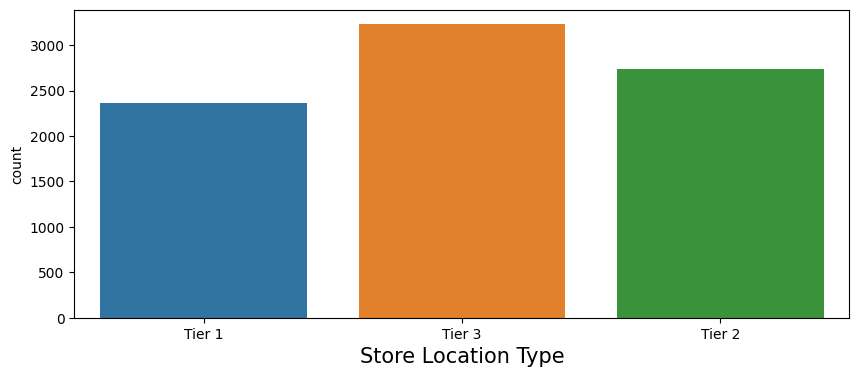

In [461]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

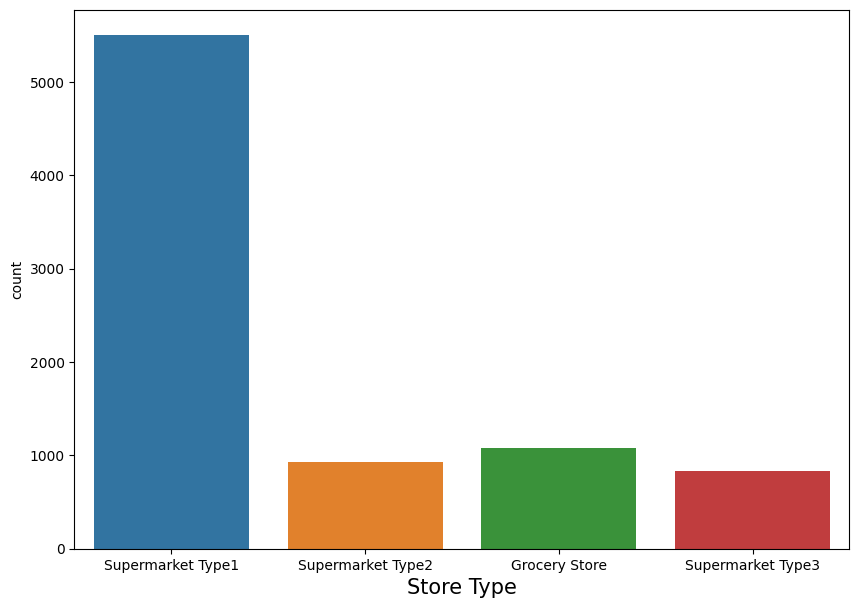

In [462]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

#### Realizations
* **Item_Fat_Content**: Most items sold are **low Fat**.
* **Item_Type**: Distictly **fruits & veg**, **food snacks** are popular.
* **Item_Type_Combined**: Most sold item cateogory is food.
* **Outlet_Identifier**: Sold items are ditributed evenly amoung all stores, execpt **OUT010** and **OUT019**.
* **Outlet_Size**: Bigmart Stores are mostly in **medium size** in this data.
* **Outlet_Location_Type**: Most common type of location is **Tier3**.
* **Outlet_Type**: By a wide mergin most Store Types are **SuperMarket Type1**.

For Numerical Data


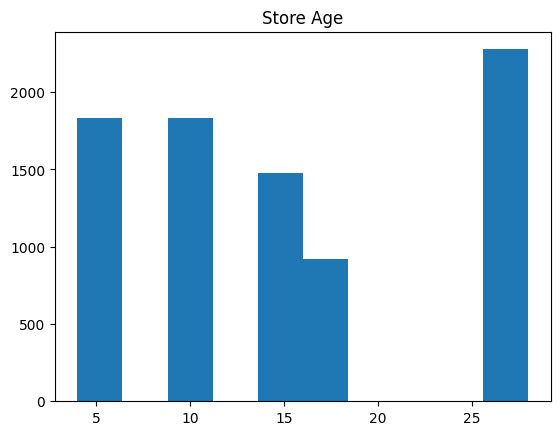

In [463]:
# HistPlot for Outlet_Age
plt.hist(x=data['Oultet_Age'], )
plt.title('Store Age')
plt.show()

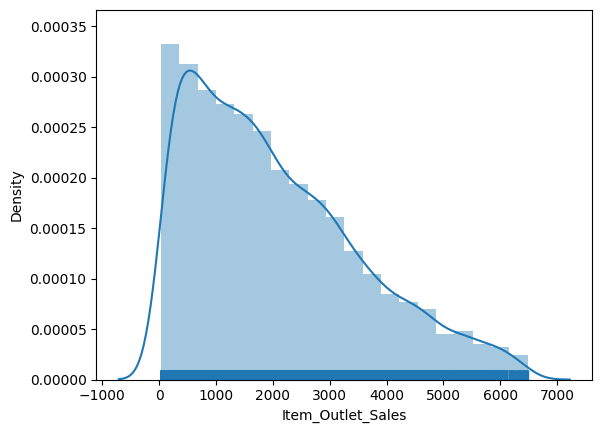

In [464]:
# Distribution of target values
sns.distplot(data['Item_Outlet_Sales'],bins=20,rug=True,hist=True)
plt.show()

#### Realizations
* **Outlet_Age**: Most Common **Outlets** are 35 year's old.

### Bivariate plots

For Numeric Data

> Let's check following relationships
* **Sales per Item_MRP**
* **Sales per Item_Visibility**
* **Sales per Item_Weight**



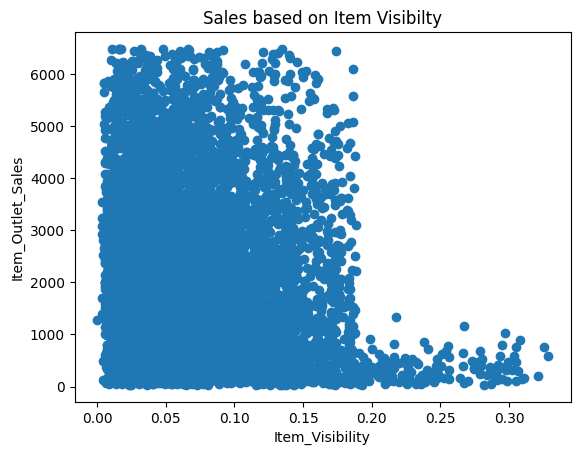

In [465]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

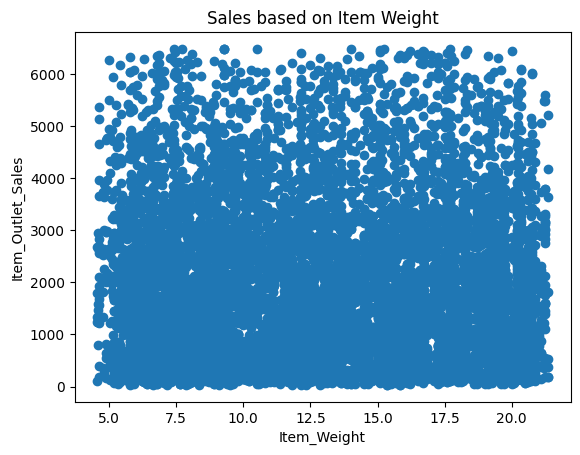

In [466]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

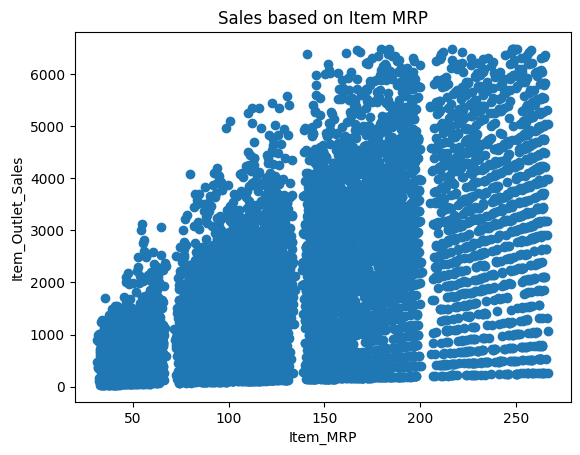

In [467]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#### Realizations
* **Item_Visibility**: Looks like it has **negative correlation**.
* **Item_Weight**: Not a particular Pattern, data is very spread.
* **Item_MRP**: Items with higer **MRP** Sales tends to sell better.

For Categorical Data

> Let's check following relationships

* **Sales per Item_Type_Combined**
* **Sales per Outlet_Identifier**
* **Sales per Outlet_Type**
* **Sales per Outlet_Size**
* **Sales per Outlet_Location_Type**


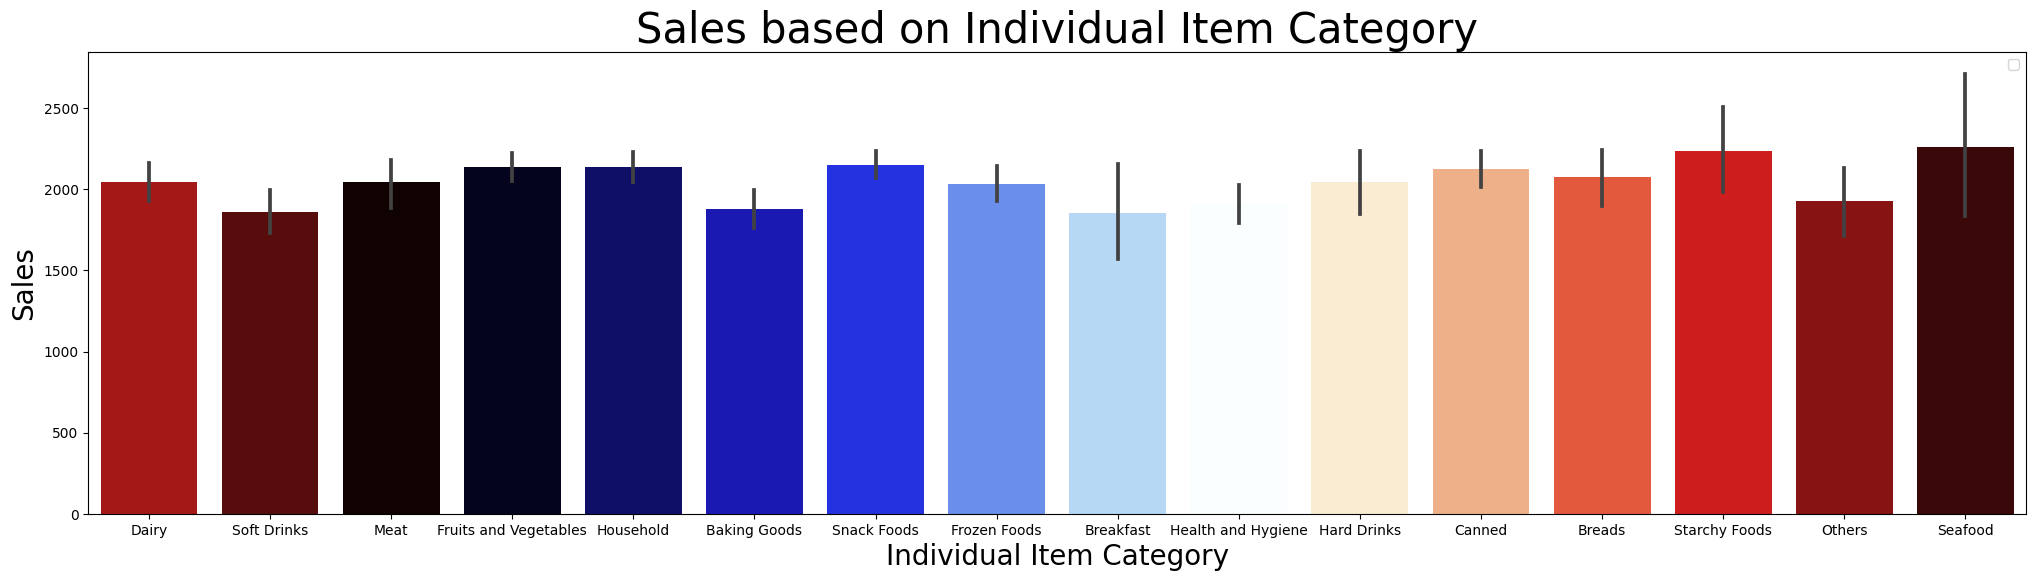

In [468]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

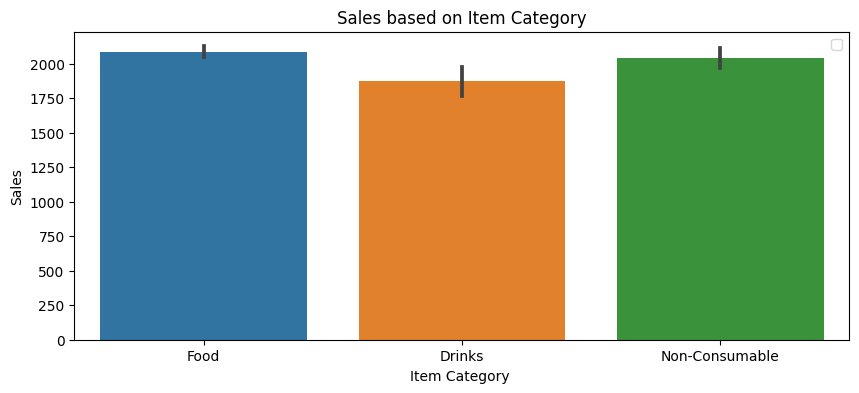

In [469]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

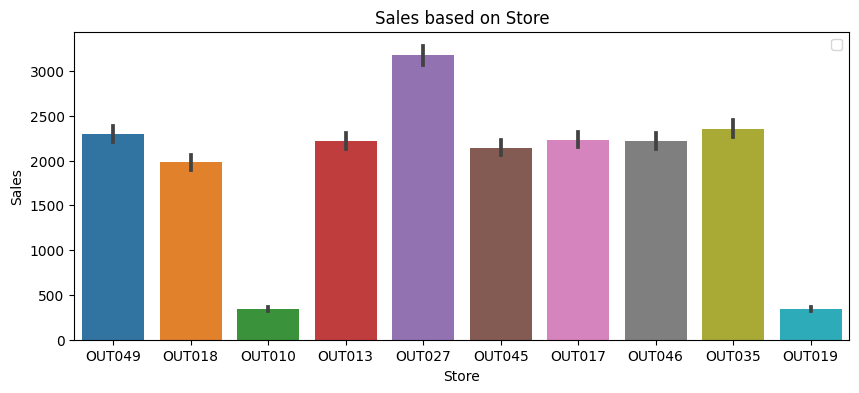

In [470]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

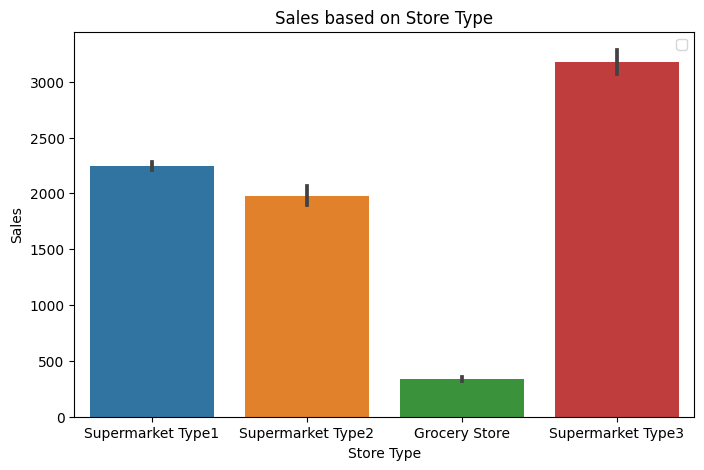

In [471]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

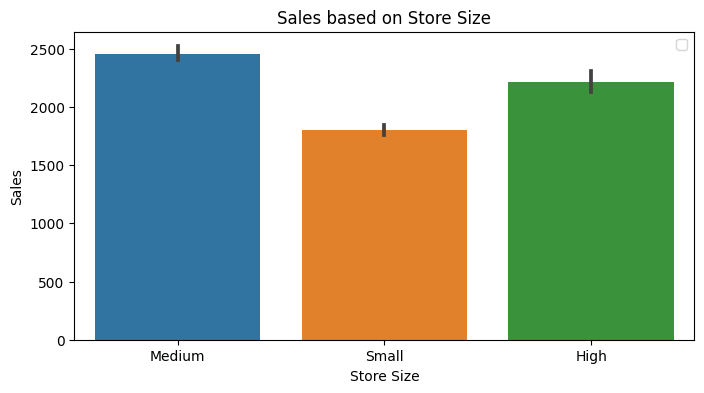

In [472]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

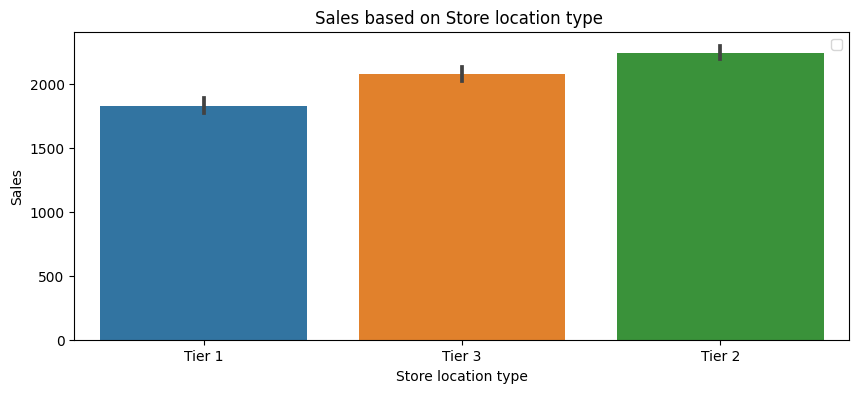

In [473]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Realizations
* **Item_Type_Combined**: Based on Categories, **Food** has most Sells, but difference is very small.
* **Outlet_Identifier**: **Outlet027** has most profitable, and **Outlet019** and **Outlet010** has least Sells.
* **Outlet_Type**: Most Sells are through **SuperMarket Type3** surprisingly not **Type1**.
* **Outlet_Size**: Sells are mostly even in  **Medium** and **High** size Stores.
* **Outlet_Location_Type**: Most sells are through **Tier3** and **Tier2**, **Tier2** is slightly higher.

## Multivariate plots
Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4.Swarm plot

Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

> Let's check following data
* **Outlet Type in all Outlet location based on sales.**
* **Sales of Item_Type based on Outlet_Type.**
* **Outlet_Location_Type of Outlet_Type based on sales.**
* **Sales of Outlet_Location_Type based on Item_Type_Combined.**

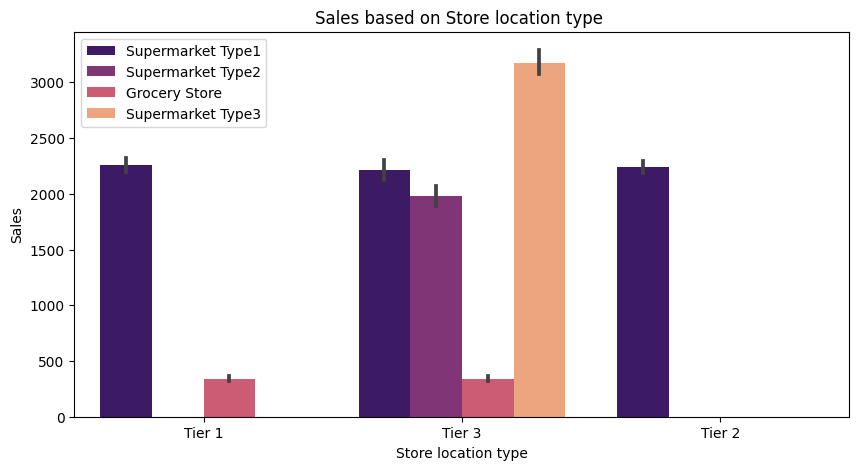

In [474]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

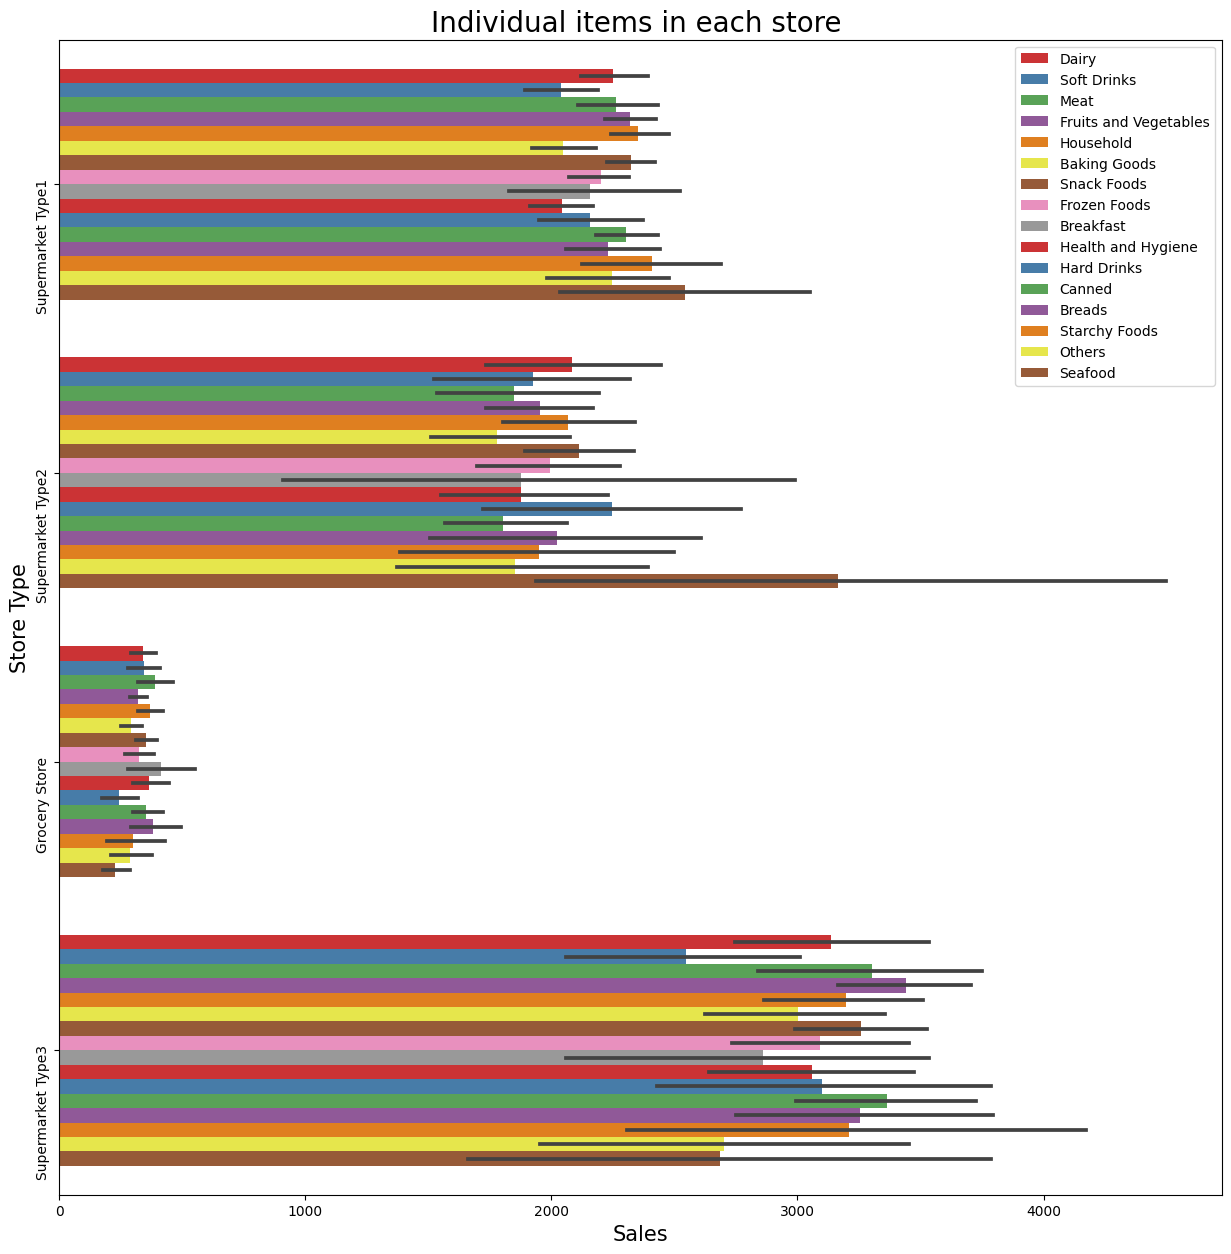

In [475]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

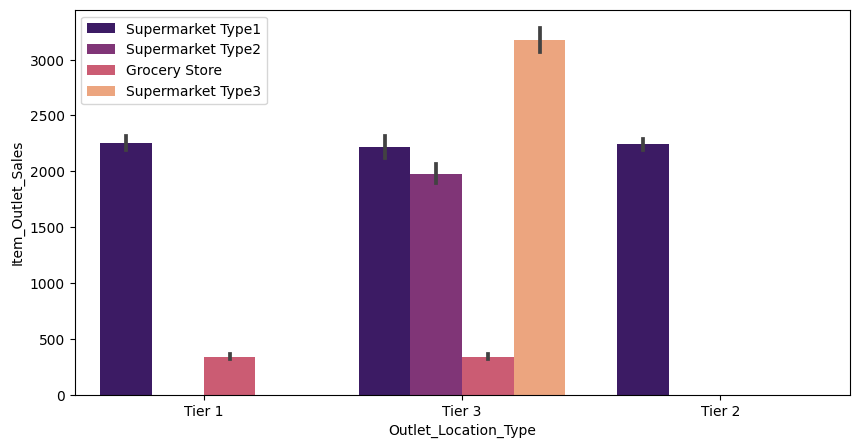

In [476]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

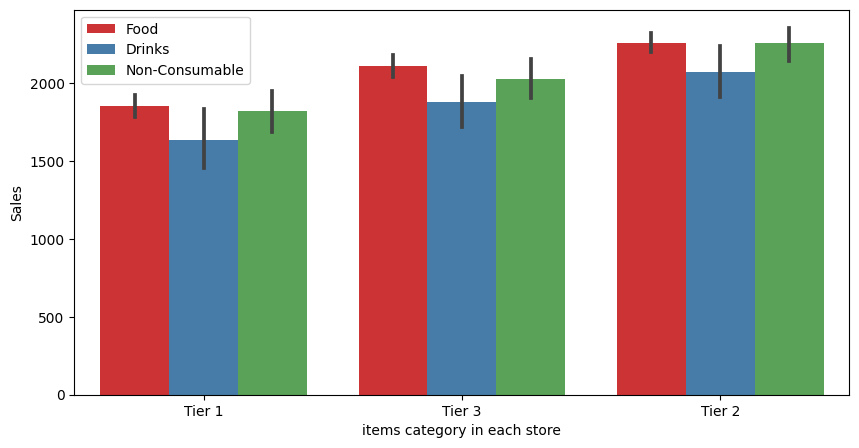

In [477]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

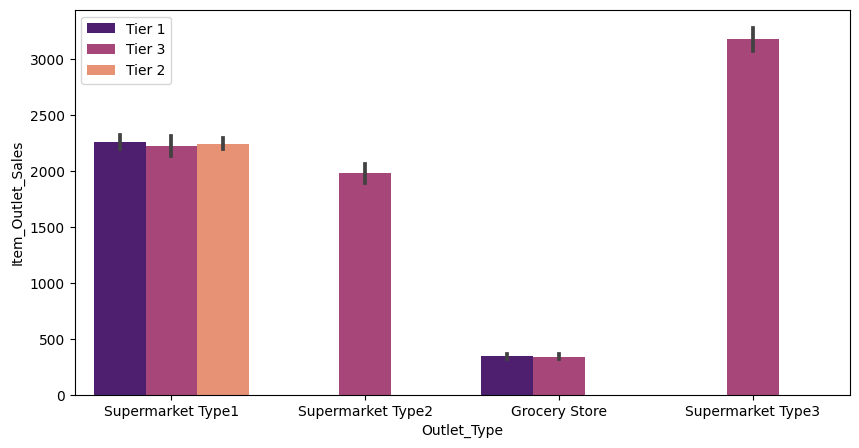

In [478]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=data,palette='magma')
plt.legend()

### Realizations
* **Seafood** is the most **item_type** sold in **SuperMarket 1 and 2**, **Grocery store** has less **sales.**
* Only **Teir3** has **all Outlet_Type**, and **SuperMarket type3** has most **sales.**.
* **Outlet_Location_Type** has almost **equal sales** based on **Item_Type_combined.**


## Correlation Matrix

<Axes: >

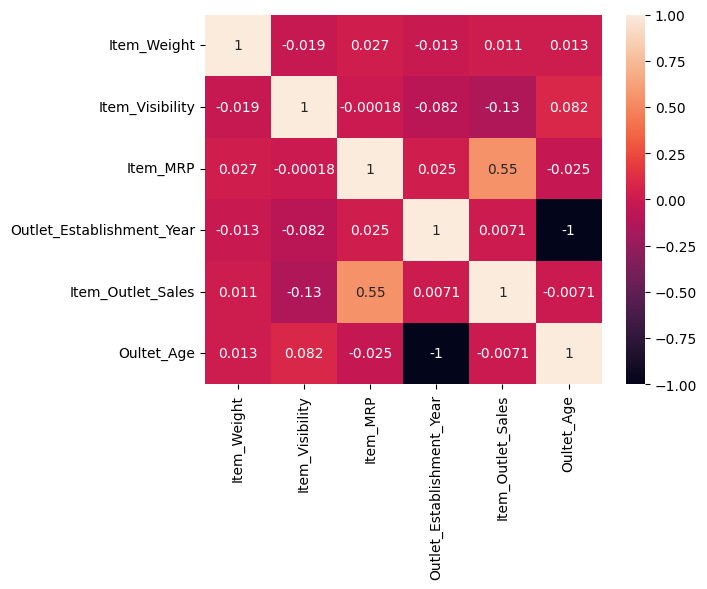

In [479]:
# Correlation Matrix
plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)

* We can see **Item_Outlet_Sales** is highly correlated with **Item_MRP**.
* We can see **Outlet_Age** and **Item_Visibility** are negativaly correlated, we need to drop them.

# *6. Feature Engineering*
The main feature engineering techniques are:

* Categorical encoding
* Variable transformation
* Outlier engineering
* Date and time engineering

#### There are 7 categorial columns
#### Ordinal Data:
*     Item_Fat_Content
*     Outlet_Size
*     Outlet_Location_Type

#### Nominal Data:
* Item_Identifier
* Item_Type
* Outlet_Identifier
* Outlet_Type

Since **Item_Identifier**, **Outlet_Identifier** don't have significant values, we can drop them.

#### Label Encoding for Ordinal Data

In [480]:
# Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26


#### One-Hot encoding for Nominal Data

In [481]:
# One-Hot encoding for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = data.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [482]:
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


#### Normalization

In [483]:
scaler_Robust=RobustScaler()
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()
scaled_X_Robust=pd.DataFrame(scaler_Robust.fit_transform(data_fe[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
                             ,columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'])
scaled_X_minmax=pd.DataFrame(scaler_minmax.fit_transform(data_fe[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
                             ,columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'])
scaled_X_standard=pd.DataFrame(scaler_standard.fit_transform(data_fe[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]),
                                columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'])

In [484]:
scaled_X_standard

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.768166,-1.075012,1.797705,0.124185
1,-1.495568,-1.010464,-1.476724,1.327635
2,0.996535,-1.060772,0.039918,0.124185
3,1.362388,-1.090468,0.697549,0.003840
4,-0.847793,-1.234141,-1.385868,-1.319955
...,...,...,...,...
8332,-1.292197,-0.261179,1.224389,-1.319955
8333,-0.966157,-0.456985,-0.503725,0.485220
8334,-0.488397,-0.692650,-0.877969,0.725910
8335,-1.217950,1.505636,-0.585347,1.327635


In [485]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_Type_Combined',
                     'Outlet_Establishment_Year','Item_Type'], axis=1)
data_fe.head()

# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

train = train.drop('source', axis=1)
test = test.drop(['source',  'Item_Outlet_Sales'], axis=1)

# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True))
train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8337 non-null   float64
 1   Item_MRP                           8337 non-null   float64
 2   Outlet_Size                        8337 non-null   int64  
 3   Outlet_Location_Type               8337 non-null   int64  
 4   Outlet_Type                        8337 non-null   int64  
 5   Item_Outlet_Sales                  8337 non-null   float64
 6   Item_Type_Combined_Drinks          8337 non-null   int64  
 7   Item_Type_Combined_Food            8337 non-null   int64  
 8   Item_Type_Combined_Non-Consumable  8337 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 651.3 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries


,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,2,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


# *7. Machine Learning Models*

Divide dataset into two variables.

* **X** as the features we defined earlier.
* **y** as the Item_Outlet_Sales the target value we want to predict.
### Assumptions:
* This is a regression problem.
* Train test split 8:2 ratio respectively.

### Regression Models
1. **Linear Regression**
2. **Lasso Regression**
3. **Ridge Regression**
4. **Random Forest Regressor**
5. **XGBoost Regressor**

In [486]:
# Extracting Dependent and Independent Variable
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

## Linear Regression

### Equation of linear Regression
**y = B0 + Bixi**

* B0 = **Intercept**: means where linear line **intercept y when x = 0**
* xi = any indpendent veriable/ **feature**
* Bi = How **impactfull** feature is greater the bi means more valuable the feature is.

In [487]:
# Model
linear_reg = LinearRegression()

# Fit
linear_reg.fit(X_train, y_train)

# Predict
y_predict = linear_reg.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

 Mean Absolute Error: 841.7399321979832

 Squared Mean Squared Error: 1083.0083784825522

 R^2 Score: 0.4720668459427

LinearRegression() Scores:
0.48
0.49
0.46
0.48
0.48
Average LinearRegression() score: 0.4778


Outlet_Location_Type                -322.671164
Outlet_Size                         -156.362962
Item_Type_Combined_Drinks            -23.091355
Item_Type_Combined_Non-Consumable    -20.672003
Item_Weight                           -0.839481
Item_MRP                              13.892046
Item_Type_Combined_Food               43.763358
Outlet_Type                          866.786806
dtype: float64


<Axes: >

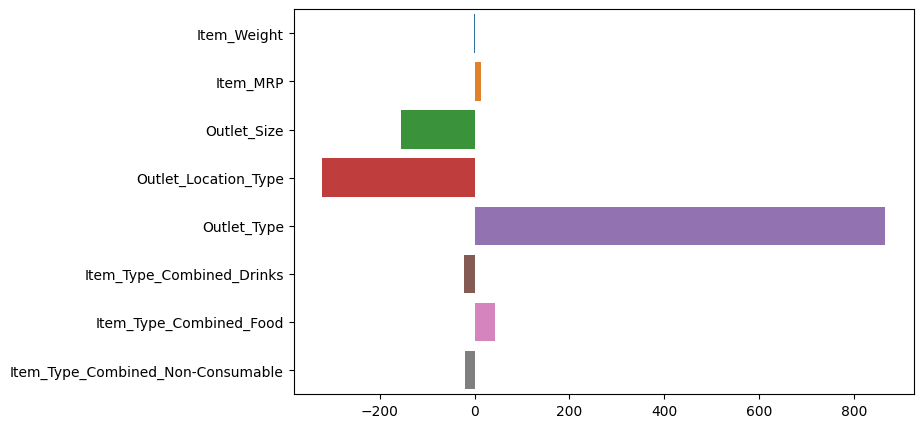

In [488]:
# Visualization of model's perfomance
LR_coef = pd.Series(linear_reg.coef_, linear_reg.feature_names_in_).sort_values()
print(LR_coef)
plt.figure(figsize=(8,5))
sns.barplot(x=linear_reg.coef_,y=linear_reg.feature_names_in_)

### Observations
* Outlet_Type_Supermarket Type3 has **highest impact** in model.
* R^2 is close to 1, but **it is in 0.5 range**, so predictor is good.

## Regularization

When **indepdent veriables/ features** have large **coefficients/slope**, it can be **computationaly** **expensive**, so we do **regulariation technique** to reduce regression cefficients/slope and model complexity.


* Types of Regularization:

1. Lasso Regression
2. Ridge Regression

* Lasso regression **performs L1 regularization**, which adds a penalty equal to the absolute value of the **magnitude of coefficients**. This type of regularization can result in sparse models with few coefficients; **Some coefficients can become zero** and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.

* On the other hand, **L2 regularization** (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.










In [489]:
# Lasso Regression
# Model
lasso_reg = Lasso(alpha=0.05)

# Fit
lasso_reg.fit(X_train, y_train)

# Predict
y_predict = lasso_reg.predict(X_test)

# Score Metrics for Regression:
LS_MAE = MAE(y_test, y_predict)
LS_MSE = MSE(y_test, y_predict)
LS_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(),X,y,5)

 Mean Absolute Error: 841.726353976078

 Mean Squared Error: 1172885.8412699758

 R^2 Score: 0.4720764361793124

Lasso() Scores:
0.48
0.49
0.46
0.48
0.48
Average Lasso() score: 0.4778


Outlet_Location_Type                -322.485070
Outlet_Size                         -156.203738
Item_Type_Combined_Drinks             -1.882956
Item_Weight                           -0.835746
Item_Type_Combined_Non-Consumable     -0.000000
Item_MRP                              13.892099
Item_Type_Combined_Food               64.376063
Outlet_Type                          866.674132
dtype: float64


<Axes: >

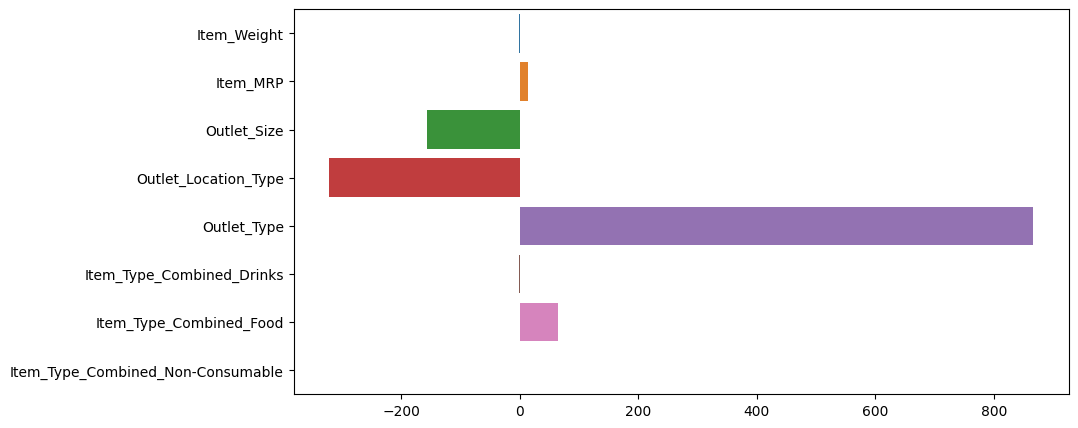

In [490]:
# Visuaization of model's perfomance
LS_coef = pd.Series(lasso_reg.coef_, lasso_reg.feature_names_in_).sort_values()
print(LS_coef)
plt.figure(figsize=(10,5))
sns.barplot(x=lasso_reg.coef_,y=lasso_reg.feature_names_in_)

In [491]:
# Ridge Regression
# Model
ridge_reg = Ridge()

# Fit
ridge_reg.fit(X_train, y_train)

# Predict
y_predict = ridge_reg.predict(X_test)

# Score Metrics for Regression:
R_MAE = MAE(y_test, y_predict)
R_MSE = MSE(y_test, y_predict)
R_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {R_MAE}\n")
print(f" Mean Squared Error: {R_MSE}\n")
print(f" R^2 Score: {R_R_2}\n")

# Cross Validation Score check
cross_val(Lasso(),X,y,5)

 Mean Absolute Error: 841.7250590873847

 Mean Squared Error: 1172883.1800144718

 R^2 Score: 0.4720776340277648

Lasso() Scores:
0.48
0.49
0.46
0.48
0.48
Average Lasso() score: 0.4778


Outlet_Type                          866.458565
Item_Type_Combined_Food               43.746311
Item_MRP                              13.891916
Item_Weight                           -0.839858
Item_Type_Combined_Non-Consumable    -20.673402
Item_Type_Combined_Drinks            -23.072909
Outlet_Size                         -156.326636
Outlet_Location_Type                -322.439224
dtype: float64


<Axes: >

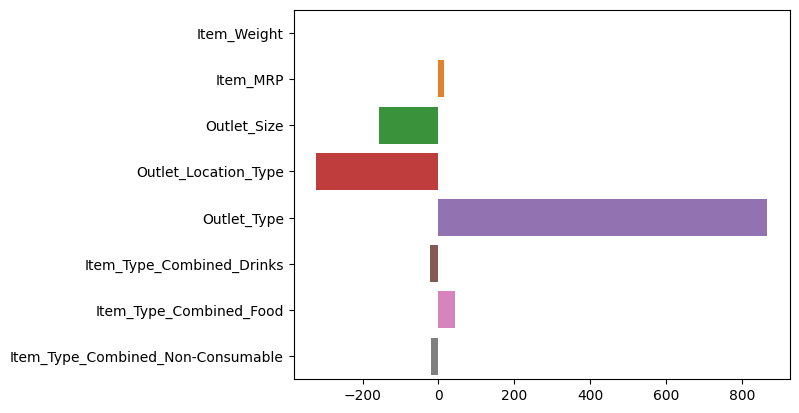

In [492]:
# Visualization of model's perfomance
R_coef = pd.Series(ridge_reg.coef_, ridge_reg.feature_names_in_).sort_values(ascending=False)
print(R_coef)
sns.barplot(x=ridge_reg.coef_,y=ridge_reg.feature_names_in_)

## Random Forest Regressor


In [493]:
# Model
random_forest = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit
random_forest.fit(X_train, y_train)

# Predict
y_predict = random_forest.predict(X_test)

# Score Metrics
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RandomForestRegressor(),X, y, 5)

 Mean Absolute Error: 718.1273348955266

 Mean Squared Error: 945500.1707830498

 R^2 Score: 0.5744242089133027

RandomForestRegressor() Scores:
0.52
0.51
0.48
0.53
0.53
Average RandomForestRegressor() score: 0.5131


Item_MRP                             0.545500
Outlet_Type                          0.448041
Item_Weight                          0.002964
Outlet_Location_Type                 0.001605
Outlet_Size                          0.001022
Item_Type_Combined_Food              0.000840
Item_Type_Combined_Non-Consumable    0.000027
Item_Type_Combined_Drinks            0.000000
dtype: float64


<Axes: >

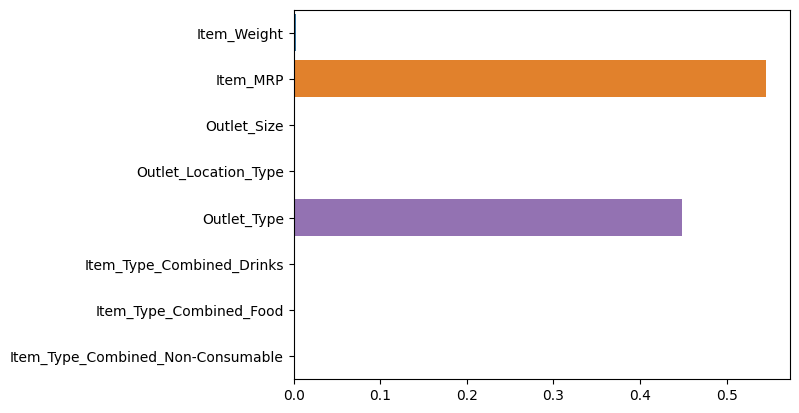

In [494]:
# Visualization of model's perfomance
RFR_coef = pd.Series(random_forest.feature_importances_, random_forest.feature_names_in_).sort_values(ascending=False)
print(RFR_coef)
sns.barplot(x=random_forest.feature_importances_, y=random_forest.feature_names_in_)

## Gradient Boosting Regressor

In [495]:
# Model
gbr = GradientBoostingRegressor()

# Fit
gbr.fit(X_train, y_train)

# Predict
y_predict = gbr.predict(X_test)

# Score Metrics
RGB_MAE = MAE(y_test, y_predict)
RGB_MSE = MSE(y_test, y_predict)
RGB_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RGB_MAE}\n")
print(f" Mean Squared Error: {RGB_MSE}\n")
print(f" R^2 Score: {RGB_R_2}\n")
cross_val(GradientBoostingRegressor(),X, y, 5)

 Mean Absolute Error: 708.752939611297

 Mean Squared Error: 927244.9346567268

 R^2 Score: 0.5826410097093302

GradientBoostingRegressor() Scores:
0.59
0.58
0.58
0.59
0.59
Average GradientBoostingRegressor() score: 0.5859


## XGBoost Regressor

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

![image](https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png)

In [496]:
# Model
xgb = XGBRegressor()

# Fit
xgb.fit(X_train, y_train)

# Predict
y_predict = xgb.predict(X_test)

# Score Matrix
XG_MAE = MAE(y_test, y_predict)
XG_MSE = MSE(y_test, y_predict)
XG_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")
print(f" R^2 Score: {XG_R_2}\n")
cross_val(XGBRegressor(),X, y, 5)

 Mean Absolute Error: 761.9328402504542

 Mean Squared Error: 1071171.3149916385

 R^2 Score: 0.5178588075881532

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.52
0.48
0.53
0.53
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsamp

Outlet_Type                          0.656383
Item_MRP                             0.135247
Item_Type_Combined_Drinks            0.048880
Item_Type_Combined_Non-Consumable    0.034884
Outlet_Size                          0.033279
Item_Type_Combined_Food              0.032013
Outlet_Location_Type                 0.031630
Item_Weight                          0.027684
dtype: float32


<Axes: >

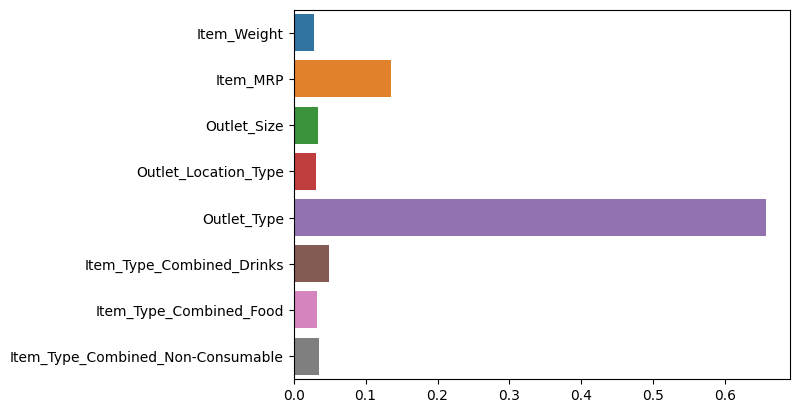

In [497]:
# Visualization of model's perfomance
XG_coef = pd.Series(xgb.feature_importances_, xgb.feature_names_in_).sort_values(ascending=False)
print(XG_coef)
sns.barplot(x=xgb.feature_importances_,y=xgb.feature_names_in_)

## Hyperparameter tuning for XGB and GBR

In [498]:
from sklearn.model_selection import RandomizedSearchCV

xgb_param_dist = {
    'n_estimators': np.random.randint(100, 500, 5),
    'max_depth': np.random.randint(1, 10, 5),
    'learning_rate': np.random.uniform(0.01, 0.3, 5)
}

xgb_random_search = RandomizedSearchCV(
    xgb, xgb_param_dist, n_iter=20,scoring='neg_mean_absolute_error', random_state=42
)
xgb_random_search.fit(X_train, y_train)
xgb_best_model = xgb_random_search.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)

# Score Matrix
XGB_MAE = MAE(y_test, xgb_pred)
XGB_MSE = MSE(y_test, xgb_pred)
XGB_R_2 = R2(y_test, xgb_pred)
print(f" Mean Absolute Error: {XGB_MAE}\n")
print(f" Mean Squared Error: {XGB_MSE}\n")
print(f" R^2 Score: {XGB_R_2}\n")

print("XGBoost Best Parameters:", xgb_random_search.best_params_)

 Mean Absolute Error: 707.5504532494707

 Mean Squared Error: 924000.3654689348

 R^2 Score: 0.5841014114538233

XGBoost Best Parameters: {'n_estimators': 335, 'max_depth': 4, 'learning_rate': 0.019611188844722204}


In [499]:
gbr_param_dist = {
    'n_estimators': np.random.randint(100, 500, 5),
    'max_depth': np.random.randint(1, 10, 5),
    'learning_rate': np.random.uniform(0.01, 0.3, 5)
}

gbr_random_search = RandomizedSearchCV(
    gbr, gbr_param_dist, n_iter=20,scoring='neg_mean_absolute_error', random_state=42
)
gbr_random_search.fit(X_train, y_train)
gbr_best_model = gbr_random_search.best_estimator_
gbr_pred = gbr_best_model.predict(X_test)

# Score Metrics
RGB1_MAE = MAE(y_test, gbr_pred)
RGB1_MSE = MSE(y_test, gbr_pred)
RGB1_R_2 = R2(y_test, gbr_pred)
print(f" Mean Absolute Error: {RGB1_MAE}\n")
print(f" Mean Squared Error: {RGB1_MSE}\n")
print(f" R^2 Score: {RGB1_R_2}\n")

print("Gradient Boosting Regressor Best Parameters:", gbr_random_search.best_params_)

 Mean Absolute Error: 707.8526975223238

 Mean Squared Error: 924314.0502176603

 R^2 Score: 0.5839602199033447

Gradient Boosting Regressor Best Parameters: {'n_estimators': 132, 'max_depth': 3, 'learning_rate': 0.05831366369506832}


# *8. Saving the final model*

In [500]:
import pickle

pickle.dump(gbr_best_model, open('gbr_best_model.pkl', 'wb'))

# *9. Conclusion*


Finally, from the comparison of evaluation metrics scores of all the models implemented with optimal paprameters, we have arrived to the conclusion that **Gradient Boosting Regressor** is the best performing model.